In [196]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [214]:
df = pd.read_csv("parkinsons.data") #loading dataset
df.head(12)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


In [198]:
X = df.drop(columns=["name", "status"]) #removing non-numerical feature
y = df["status"] #creating target feature

In [215]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) #splitting dataset into train and test data
print(X_train.shape, X_test.shape)

(156, 22) (39, 22)


In [217]:
X_train

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
172,110.739,113.597,100.139,0.00356,0.000030,0.00170,0.00200,0.00510,0.01484,0.133,...,0.01285,0.02261,0.00430,26.550,0.369090,0.776158,-6.085567,0.192375,1.889002,0.174152
84,176.858,205.560,75.344,0.00747,0.000040,0.00418,0.00420,0.01254,0.04795,0.435,...,0.03510,0.08037,0.05470,13.893,0.556494,0.729586,-5.288912,0.343073,3.099301,0.242119
135,110.453,127.611,105.554,0.00494,0.000040,0.00244,0.00315,0.00731,0.04128,0.379,...,0.03316,0.06688,0.02529,17.707,0.653427,0.706687,-5.333619,0.322044,2.631793,0.228319
42,237.226,247.326,225.227,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.01133,0.03104,0.00740,22.736,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
143,202.805,231.508,86.232,0.00370,0.000020,0.00189,0.00211,0.00568,0.01997,0.180,...,0.01506,0.03350,0.02010,18.687,0.536102,0.632631,-5.898673,0.213353,2.470746,0.189032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,148.143,155.982,135.041,0.00392,0.000030,0.00204,0.00231,0.00612,0.01450,0.131,...,0.01263,0.02175,0.00540,23.683,0.398499,0.778349,-5.711205,0.240875,2.845109,0.192730
111,208.519,220.315,199.020,0.00609,0.000030,0.00368,0.00339,0.01105,0.01761,0.155,...,0.01307,0.02855,0.00830,22.407,0.338097,0.712466,-6.471427,0.184378,2.502336,0.136390
130,120.289,128.143,100.209,0.00492,0.000040,0.00269,0.00238,0.00808,0.01412,0.125,...,0.01194,0.02110,0.01610,23.949,0.467160,0.724045,-6.135296,0.203630,2.539724,0.169923
33,202.266,211.604,197.079,0.00180,0.000009,0.00093,0.00107,0.00278,0.00954,0.085,...,0.00719,0.01407,0.00072,32.684,0.368535,0.742133,-7.695734,0.178540,1.544609,0.056141


In [219]:
X_test

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
185,116.286,177.291,96.983,0.00314,0.000030,0.00134,0.00192,0.00403,0.01564,0.136,...,0.01691,0.02001,0.00737,24.199,0.598515,0.654331,-5.592584,0.133917,2.058658,0.214346
77,110.568,125.394,106.821,0.00462,0.000040,0.00226,0.00280,0.00677,0.02199,0.197,...,0.01636,0.03852,0.00420,25.820,0.429484,0.816340,-5.391029,0.250572,1.777901,0.232744
76,112.876,148.826,106.981,0.00500,0.000040,0.00270,0.00289,0.00810,0.03999,0.350,...,0.02704,0.07238,0.00905,23.370,0.489538,0.789977,-5.775966,0.341169,2.007923,0.193918
113,210.141,232.706,185.258,0.00534,0.000030,0.00321,0.00280,0.00964,0.01680,0.149,...,0.01301,0.02583,0.00620,23.671,0.441097,0.722254,-5.963040,0.250283,2.489191,0.177807
62,222.236,231.345,205.495,0.00266,0.000010,0.00152,0.00144,0.00457,0.01643,0.145,...,0.01200,0.02602,0.00340,25.856,0.364867,0.694399,-6.966321,0.095882,2.278687,0.103224
85,180.978,200.125,155.495,0.00406,0.000020,0.00220,0.00244,0.00659,0.03852,0.331,...,0.02877,0.06321,0.02782,16.176,0.583574,0.727747,-5.657899,0.315903,3.098256,0.200423
129,120.078,126.632,105.667,0.00270,0.000020,0.00116,0.00135,0.00349,0.01022,0.090,...,0.00903,0.01428,0.00487,26.369,0.491345,0.718839,-5.892061,0.195976,2.108873,0.183572
178,148.790,158.359,138.990,0.00309,0.000020,0.00152,0.00186,0.00456,0.01574,0.142,...,0.01309,0.02518,0.00488,24.412,0.402591,0.762508,-6.311987,0.182459,2.251553,0.160306
43,241.404,248.834,232.483,0.00281,0.000010,0.00157,0.00173,0.00470,0.01760,0.154,...,0.01251,0.03017,0.00675,23.145,0.457702,0.634267,-6.793547,0.158266,2.256699,0.117399
13,139.173,179.139,76.556,0.00390,0.000030,0.00165,0.00208,0.00496,0.01642,0.154,...,0.01797,0.02184,0.01041,24.889,0.430166,0.665833,-5.660217,0.254989,2.519422,0.199889


In [220]:
y_train

172    0
84     1
135    1
42     0
143    1
      ..
179    1
111    1
130    1
33     0
131    1
Name: status, Length: 156, dtype: int64

In [221]:
y_test

185    0
77     1
76     1
113    1
62     0
85     1
129    1
178    1
43     0
13     1
1      1
112    1
115    1
104    1
107    1
97     1
164    1
17     1
67     1
50     0
46     0
3      1
40     1
194    0
134    1
189    0
8      1
39     1
155    1
127    1
116    1
60     0
83     1
7      1
169    0
153    1
86     1
73     1
64     0
Name: status, dtype: int64

In [200]:
#scaling and fitting
scaler = RobustScaler()
#scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [201]:
X_train_scaled

array([[-0.60649238, -0.70583931, -0.0260763 , ..., -0.25229948,
        -0.86508574, -0.26339029],
       [ 0.45922117,  0.38840468, -0.52038955, ...,  1.20522666,
         1.35433407,  0.29809539],
       [-0.61110216, -0.53909034,  0.08187717, ...,  1.00183765,
         0.49702813,  0.1840915 ],
       ...,
       [-0.45256439, -0.53276021, -0.02468077, ..., -0.14344298,
         0.32819402, -0.2983267 ],
       [ 0.8687502 ,  0.46032067,  1.90652007, ..., -0.38610931,
        -1.49662608, -1.23829705],
       [-0.45309629, -0.56651694,  0.06630715, ..., -0.01400482,
         0.30622169, -0.29246129]], shape=(156, 22))

In [222]:
X_test_scaled

array([[-5.17085200e-01,  5.20391469e-02, -8.89943282e-02,
        -4.65806452e-01, -1.25000000e-01, -5.30892449e-01,
        -3.38530067e-01, -5.28402592e-01, -3.48949580e-01,
        -4.05498282e-01, -5.14128728e-01, -2.99791086e-01,
        -1.15252372e-01, -5.14394138e-01, -2.40423798e-01,
         3.91200302e-01,  5.99617959e-01, -8.23265319e-01,
         5.39635012e-02, -8.17695589e-01, -5.53974279e-01,
         6.86584303e-02],
       [-6.09248574e-01, -5.65469852e-01,  1.07136093e-01,
        -8.38709677e-02,  1.25000000e-01, -1.09839817e-01,
         5.34521158e-02, -1.10560427e-01, -8.21428571e-02,
        -1.26002291e-01, -2.98273155e-02, -1.54247911e-01,
        -1.45509559e-01, -2.99659775e-02, -4.12659603e-01,
         6.63419959e-01, -4.03907093e-01,  1.09333751e+00,
         1.95714350e-01,  3.10572282e-01, -1.06882032e+00,
         2.20647096e-01],
       [-5.72047968e-01, -2.86658536e-01,  1.10325854e-01,
         1.41935484e-02,  1.25000000e-01,  9.15331808e-02,
    

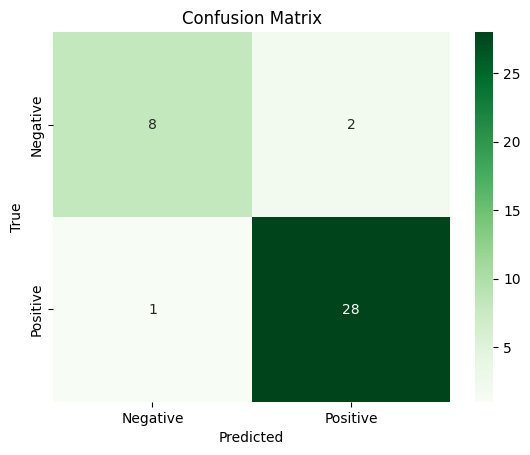

In [ ]:
rand_for_model = RandomForestClassifier(random_state=42) #creating an instance of RandomForestClassifier
rand_for_model.fit(X_train_scaled, y_train) #fitting feature and target
rand_for_pred = rand_for_model.predict(X_test_scaled) #running the prediction
cm_rf = confusion_matrix(y_test, rand_for_pred) #creating a confusion matrix
labels = ["Negative", "Positive"]

#plotting the confusion matrix for RandomForestClassifier
sns.heatmap(cm_rf, annot=True, fmt="d", xticklabels=labels, yticklabels=labels, cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [204]:
#accuracy and classification report for RandomForestClassifier
print(classification_report(y_test, rand_for_pred))
print("Accuracy:", accuracy_score(y_test, rand_for_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Accuracy: 0.9230769230769231


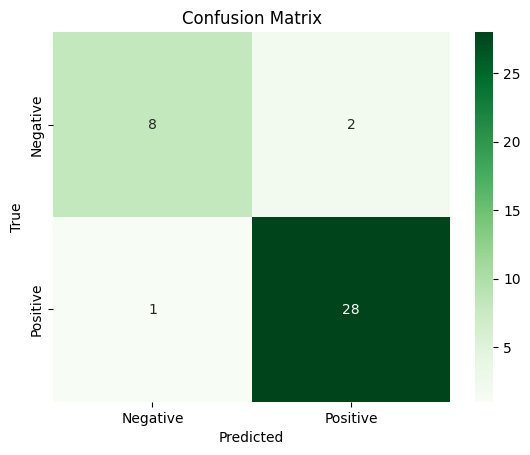

In [205]:
lr_model = LogisticRegression(random_state=42) #creating an instance of LogisticRegression
lr_model.fit(X_train_scaled, y_train) #fitting feature and target
lr_prediction = lr_model.predict(X_test_scaled) #running the prediction
cm_lr = confusion_matrix(y_test, lr_prediction) #creating a confusion matrix
label = ["Negative", "Positive"]

#plotting the confusion matrix for LogisticRegression
sns.heatmap(cm_lr, annot=True, fmt="d", xticklabels=label, yticklabels=label, cmap="Greens")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [206]:
np.array_equal(lr_prediction, rand_for_pred) #checking whether the models made the same predicitons

False

In [207]:
diff_indices = np.where(lr_prediction != rand_for_pred)[0] #getting indices for samples predicted differently
print("Different predictions at index:", diff_indices)

#looping through differently predicted samples
for i in diff_indices:
    print(f"Sample {i}: True = {y_test.iloc[i]}, Logistic = {lr_prediction[i]}, RF = {rand_for_pred[i]}") #comparing true labels against predictions

Different predictions at index: [13 33]
Sample 13: True = 1, Logistic = 0, RF = 1
Sample 33: True = 1, Logistic = 1, RF = 0


In [208]:
lr_features = pd.Series(lr_model.coef_[0], index=X_train.columns).sort_values(ascending=False) #sorting logistic regression coefficients for each feature
lr_features


spread1             1.210413
PPE                 0.938248
MDVP:APQ            0.922549
D2                  0.821092
spread2             0.480512
MDVP:RAP            0.470325
Jitter:DDP          0.468457
MDVP:Shimmer(dB)    0.304471
Shimmer:APQ5        0.261071
MDVP:Shimmer        0.245240
HNR                 0.204524
DFA                -0.045181
NHR                -0.163250
Shimmer:DDA        -0.170969
Shimmer:APQ3       -0.171121
MDVP:PPQ           -0.176149
MDVP:Flo(Hz)       -0.205164
MDVP:Fo(Hz)        -0.224743
MDVP:Fhi(Hz)       -0.304026
RPDE               -0.315734
MDVP:Jitter(Abs)   -0.484910
MDVP:Jitter(%)     -0.549857
dtype: float64

In [209]:
# accuracy and classification report for LogisticRegression
print(classification_report(y_test, lr_prediction))
print("Accuracy:", accuracy_score(y_test, lr_prediction))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.93      0.97      0.95        29

    accuracy                           0.92        39
   macro avg       0.91      0.88      0.90        39
weighted avg       0.92      0.92      0.92        39

Accuracy: 0.9230769230769231


In [210]:
feature_importances = pd.Series(rand_for_model.feature_importances_, index=X_train.columns).sort_values(ascending=False) #sorting feature importance values for each feature in RandomForestClassifier
feature_importances

PPE                 0.152476
spread1             0.106974
MDVP:Fo(Hz)         0.064174
NHR                 0.062347
Jitter:DDP          0.056404
MDVP:Fhi(Hz)        0.055774
MDVP:Flo(Hz)        0.053636
spread2             0.040810
Shimmer:APQ5        0.039663
MDVP:RAP            0.039385
D2                  0.032455
MDVP:APQ            0.031318
MDVP:Shimmer        0.030897
Shimmer:DDA         0.030771
Shimmer:APQ3        0.030374
RPDE                0.029366
MDVP:PPQ            0.029000
MDVP:Jitter(Abs)    0.026482
HNR                 0.024177
MDVP:Jitter(%)      0.021814
MDVP:Shimmer(dB)    0.021326
DFA                 0.020375
dtype: float64

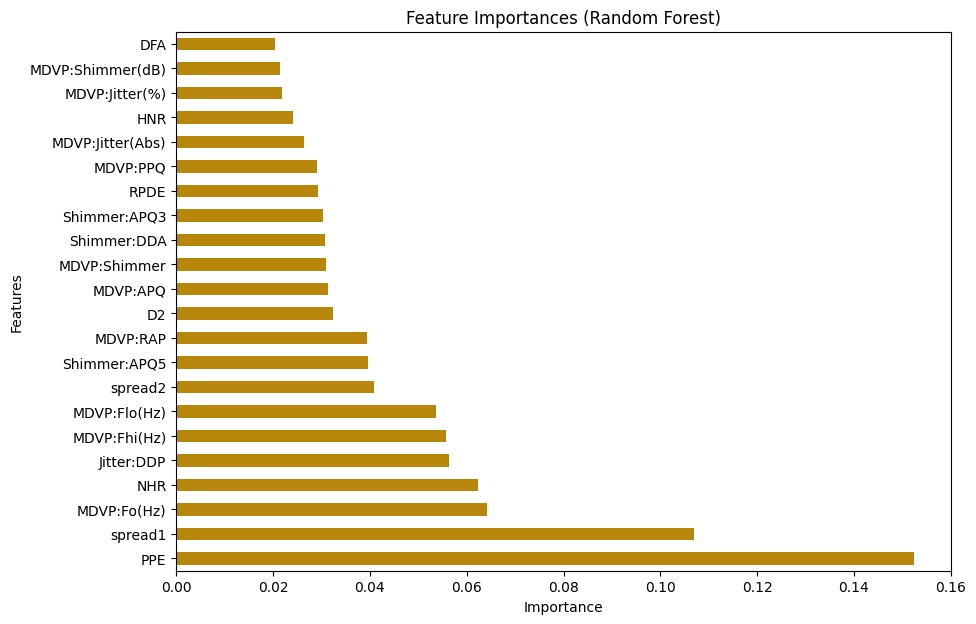

In [211]:
#plotting feature importances predicted by RandomForestClassifier
plt.figure(figsize=(10, 7))
feature_importances.plot(kind='barh', color='darkgoldenrod')
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

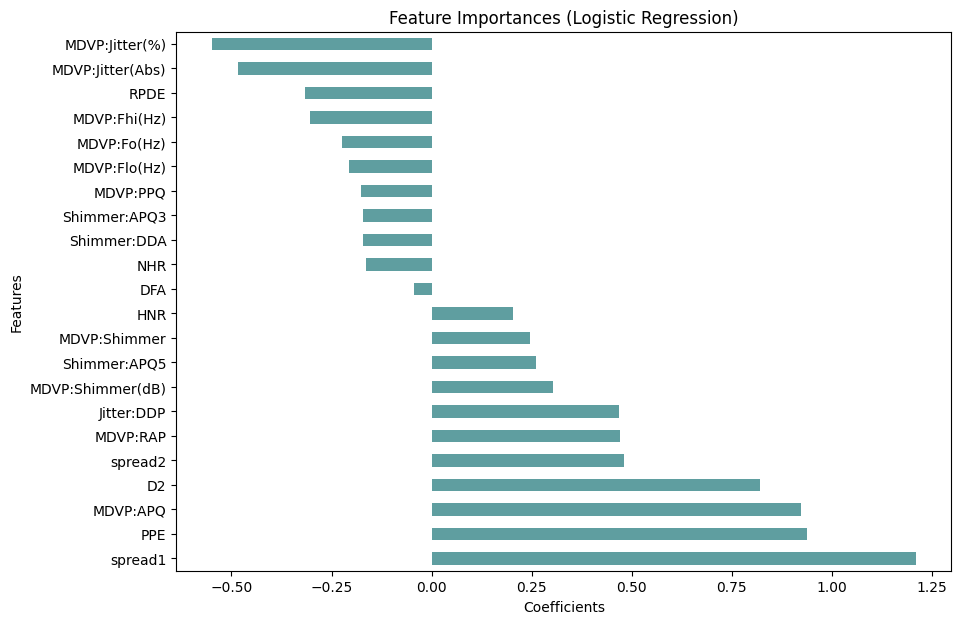

In [ ]:
#plotting coefficients calculated by LogisticRegression
plt.figure(figsize=(10, 7))
lr_features.plot(kind='barh', color='cadetblue')
plt.title("Feature Importances (Logistic Regression)")
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.show()